In [10]:
# import Python libraries

# import libraries for Numerical Python to perform Linear Algebra
# import Pandas library to perform data processing via panda's dataframes

import numpy as np
import pandas as pd
from sklearn import *

# import libraries for Plotting work

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
#print('\n'.join(os.listdir('../input')))

In [97]:
# load the data
Cities = pd.read_csv('WCities.csv')
GameCities = pd.read_csv('WGameCities.csv')
TourneyCompact = pd.read_csv('WNCAATourneyCompactResults.csv')
Seeds = pd.read_csv('WNCAATourneySeeds.csv')
Slots = pd.read_csv('WNCAATourneySlots.csv')
RegularCompact = pd.read_csv('WRegularSeasonCompactResults.csv')
Seasons = pd.read_csv('WSeasons.csv')
Teams = pd.read_csv('WTeams.csv')

In [98]:
TourneyCompact.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


In [99]:
RegularCompact.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [100]:
# convert seed to a number
Seeds['SeedNumber'] = Seeds['Seed'].apply(lambda x: int(x[-2:]))

In [101]:
Seeds.head()

,Season,Seed,TeamID,SeedNumber
0,1998,W01,3330,1
1,1998,W02,3163,2
2,1998,W03,3112,3
3,1998,W04,3301,4
4,1998,W05,3272,5


In [102]:
# merge the info

In [103]:
TourneyCompact['WSeed'] = TourneyCompact[['Season', 'WTeamID']].merge(Seeds,
                                                                      left_on = ['Season', 'WTeamID'],
                                                                      right_on = ['Season', 'TeamID'],
                                                                      how = 'left')[['SeedNumber']]


In [104]:
TourneyCompact['LSeed'] = TourneyCompact[['Season', 'LTeamID']].merge(Seeds,
                                                                      left_on = ['Season', 'LTeamID'],
                                                                      right_on = ['Season', 'TeamID'],
                                                                      how = 'left')[['SeedNumber']]


In [105]:
TourneyCompact = TourneyCompact.merge(GameCities,
                                       how = 'left',
                                       on = ['Season', 'DayNum', 'WTeamID', 'LTeamID'])

In [106]:
RegularCompact['WSeed'] = RegularCompact[['Season', 'WTeamID']].merge(Seeds,
                                                                      left_on = ['Season', 'WTeamID'],
                                                                      right_on = ['Season', 'TeamID'],
                                                                      how = 'left')[['SeedNumber']]

In [107]:
RegularCompact['LSeed'] = RegularCompact[['Season', 'LTeamID']].merge(Seeds,
                                                                      left_on = ['Season', 'LTeamID'],
                                                                      right_on = ['Season', 'TeamID'],
                                                                      how = 'left')[['SeedNumber']]

In [108]:
RegularCompact = RegularCompact.merge(GameCities,
                                       how = 'left',
                                       on = ['Season', 'DayNum', 'WTeamID', 'LTeamID'])

In [109]:
# add season results

In [110]:
RegularCompact = RegularCompact.merge(Seasons,
                                        how='left',
                                        on='Season')

In [111]:
TourneyCompact = TourneyCompact.merge(Seasons,
                                        how='left',
                                        on='Season')

In [112]:
# add team names

In [113]:
RegularCompact['WTeamName'] = RegularCompact[['WTeamID']].merge(Teams,
                                                                 how = 'left',
                                                                 left_on = 'WTeamID',
                                                                 right_on = 'TeamID')[['TeamName']]

In [114]:
RegularCompact['LTeamName'] = RegularCompact[['LTeamID']].merge(Teams,
                                                                 how = 'left',
                                                                 left_on = 'LTeamID',
                                                                 right_on = 'TeamID')[['TeamName']]

In [115]:
TourneyCompact['WTeamName'] = TourneyCompact[['WTeamID']].merge(Teams,
                                                                 how = 'left',
                                                                 left_on = 'WTeamID',
                                                                 right_on = 'TeamID')[['TeamName']]

In [116]:
TourneyCompact['LTeamName'] = TourneyCompact[['LTeamID']].merge(Teams,
                                                                 how = 'left',
                                                                 left_on = 'LTeamID',
                                                                 right_on = 'TeamID')[['TeamName']]

In [117]:
TourneyCompact['ScoreDiff'] = TourneyCompact['WScore'] - TourneyCompact['LScore']

In [118]:
RegularCompact.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,CRType,CityID,DayZero,RegionW,RegionX,RegionY,RegionZ,WTeamName,LTeamName
0,1998,18,3104,91,3202,41,H,0,2.0,NaN,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Alabama,Furman
1,1998,18,3163,87,3221,76,H,0,2.0,14.0,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Connecticut,Holy Cross
2,1998,18,3222,66,3261,59,H,0,NaN,NaN,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Houston,LSU
3,1998,18,3307,69,3365,62,H,0,8.0,14.0,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,New Mexico,Santa Clara
4,1998,18,3349,115,3411,35,H,0,NaN,NaN,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Rice,TX Southern


In [119]:
TourneyCompact.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,CRType,CityID,DayZero,RegionW,RegionX,RegionY,RegionZ,WTeamName,LTeamName,ScoreDiff
0,1998,137,3104,94,3422,46,H,0,2,15,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Alabama,UNC Greensboro,48
1,1998,137,3112,75,3365,63,H,0,3,14,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Arizona,Santa Clara,12
2,1998,137,3163,93,3193,52,H,0,2,15,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Connecticut,Fairfield,41
3,1998,137,3198,59,3266,45,H,0,7,10,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,Florida Intl,Marquette,14
4,1998,137,3203,74,3208,72,A,0,10,7,NaN,NaN,10/27/1997,East,Midwest,Mideast,West,G Washington,Georgia,2


In [ ]:
# Plot WNCAA Tourney Seeds for Top 15

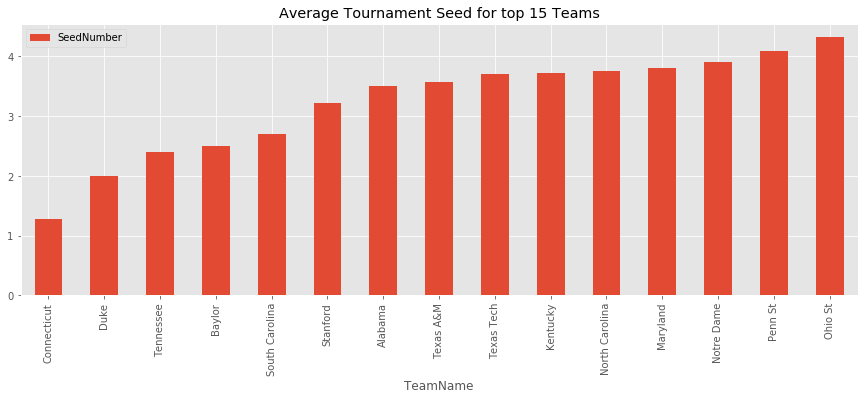

In [93]:
# calculate the averave team seed
avgseed = Seeds.groupby(['TeamID']).agg(np.mean).sort_values('SeedNumber')
avgseed = avgseed.merge(Teams, left_index=True, right_on='TeamID') # add the team name
avgseed.head(15).plot(x='TeamName', y='SeedNumber', 
                     kind='bar', figsize=(15,5),
                     title='Average Tournament Seed for top 15 Teams')

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


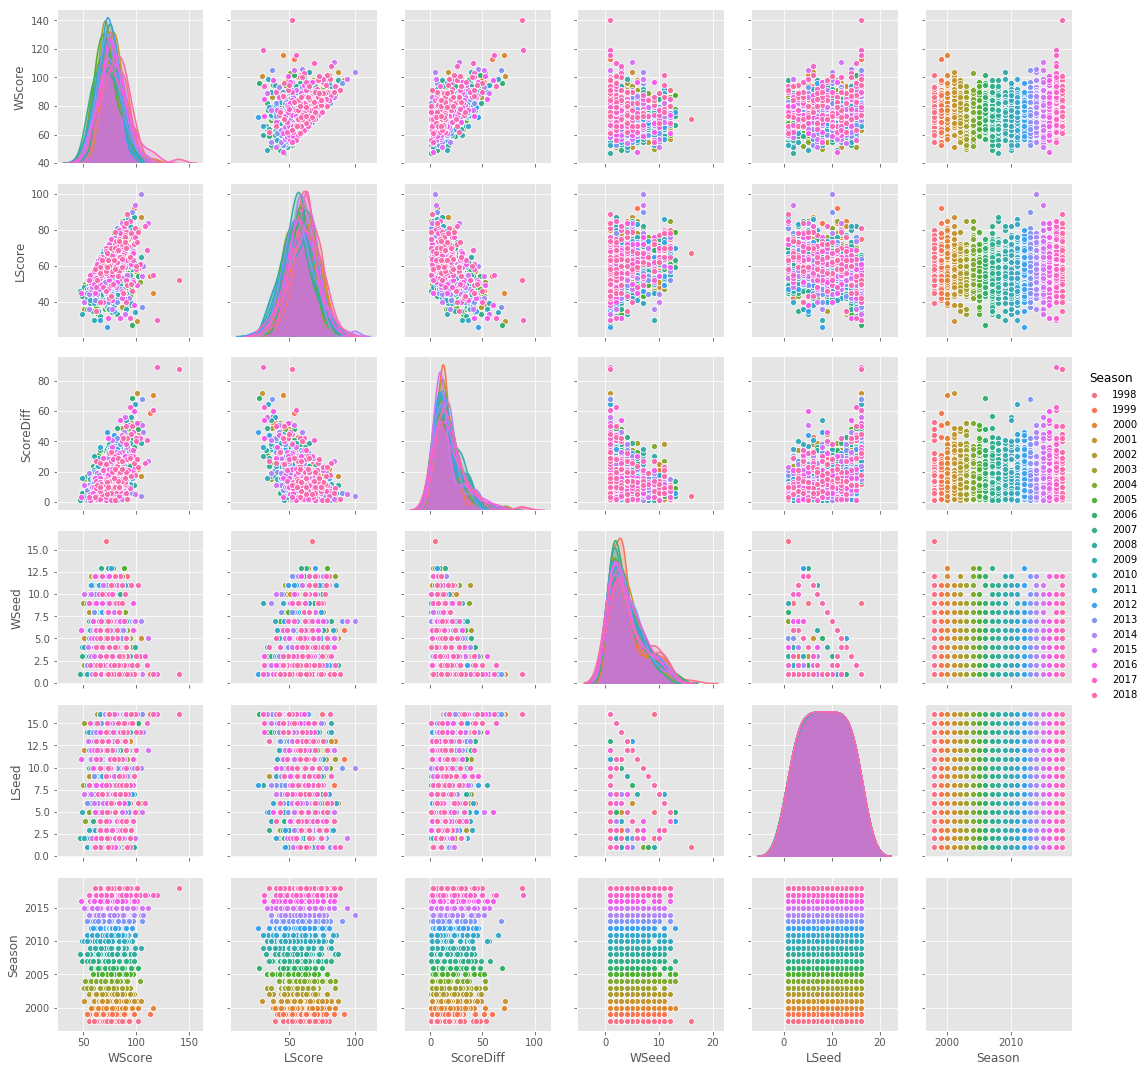

In [94]:
# create a pair plot of the Tourney Compact Results for all the Scores and Sees (HUE by Season)
sns.pairplot(TourneyCompact[['WScore', 'LScore', 'ScoreDiff', 'WSeed', 'LSeed', 'Season']], hue='Season')

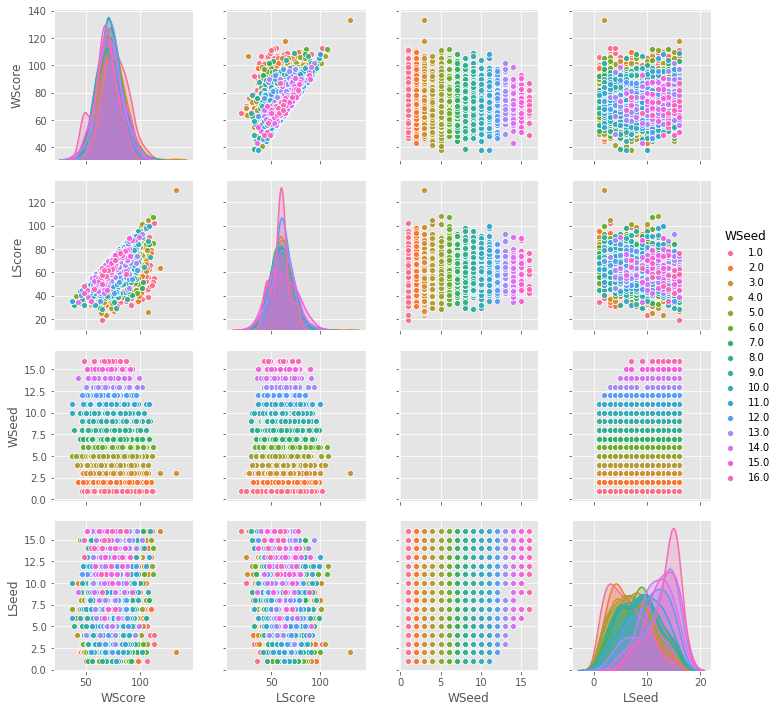

In [95]:
# create a pair plot of the Regular Season Compact results file for all the Scores and Seeds
# only for teams that made the tournament
# HUE as WSeed

# convert data to include only those teams that make the tournament
made_it = RegularCompact.dropna(subset=['WSeed', 'LSeed'])

# create the plot
sns.pairplot(data=made_it, vars=['WScore', 'LScore', 'WSeed', 'LSeed'], hue='WSeed')

In [154]:
# look at just the previous year
RegularCompact2019 = RegularCompact.loc[RegularCompact['Season']==2018]

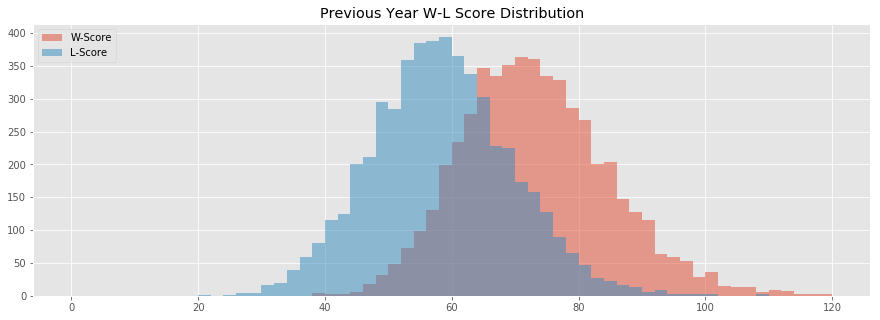

In [155]:
# layered histograms of the previous year's winners and losers scores
bins = np.linspace(0, 120, 61)
plt.figure(figsize=(15,5))
plt.title('Previous Year W-L Score Distribution')
plt.hist(RegularCompact2018['WScore'], bins, alpha=0.5, label='W-Score')
plt.hist(RegularCompact2018['LScore'], bins, alpha=0.5, label='L-Score')
plt.legend(loc='upper left')
plt.show()

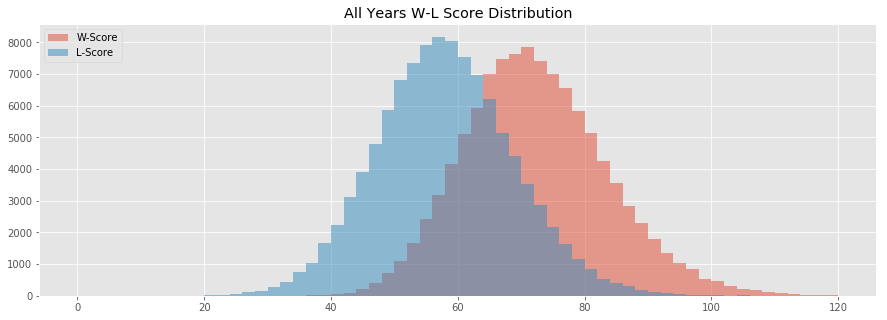

In [156]:
# layered histograms of all years winners and losers scores
bins = np.linspace(0, 120, 61)
plt.figure(figsize=(15,5))
plt.title('All Years W-L Score Distribution')
plt.hist(RegularCompact['WScore'], bins, alpha=0.5, label='W-Score')
plt.hist(RegularCompact['LScore'], bins, alpha=0.5, label='L-Score')
plt.legend(loc='upper left')
plt.show()

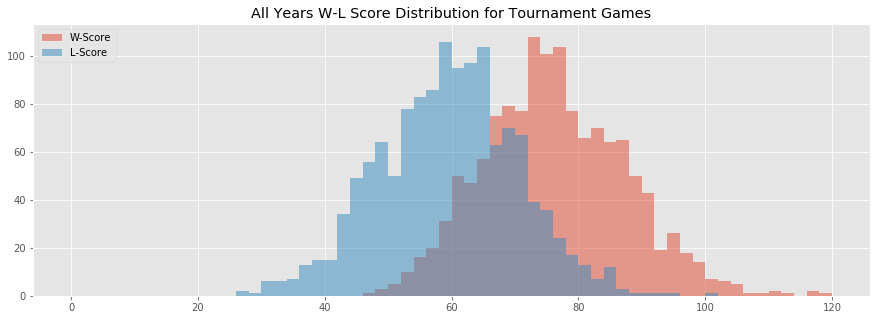

In [157]:
# layered histograms of all year's tournament winners and losers scores
bins = np.linspace(0, 120, 61)
plt.figure(figsize=(15,5))
plt.title('All Years W-L Score Distribution for Tournament Games')
plt.hist(TourneyCompact['WScore'], bins, alpha=0.5, label='W-Score')
plt.hist(TourneyCompact['LScore'], bins, alpha=0.5, label='L-Score')
plt.legend(loc='upper left')
plt.show()

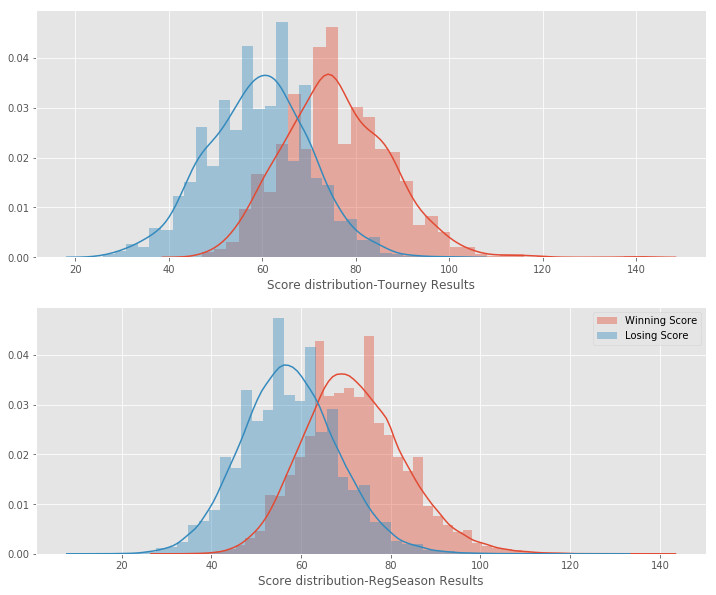

In [128]:
# plot with overlayed functions
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(12,10))
a = sns.distplot(TourneyCompact['WScore'],label='Winning Score',ax=ax1)
a = sns.distplot(TourneyCompact['LScore'],ax=a,label='Losing Score')
a.set_xlabel("Score distribution-Tourney Results")

b = sns.distplot(RegularCompact['WScore'],label='Winning Score',ax=ax2)
b = sns.distplot(RegularCompact['LScore'],ax=b,label='Losing Score')
b.set_xlabel("Score distribution-RegSeason Results")

plt.legend();

In [ ]:
# Plot Seeds from Tournament and Regular Season Winners and Losers

No handles with labels found to put in legend.


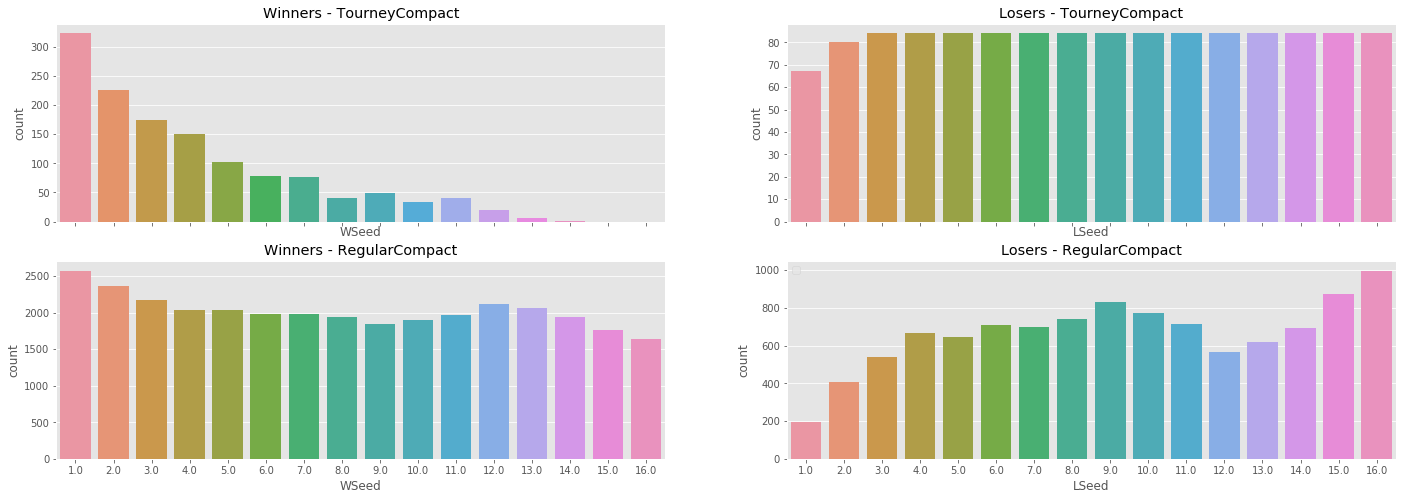

In [153]:
# tournament
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharex='col', figsize=(24,8))
ax1 = sns.countplot(x=TourneyCompact['WSeed'],ax=ax1)
ax1.set_title("Winners - TourneyCompact")
ax2 = sns.countplot(x=TourneyCompact['LSeed'],ax=ax2);
ax2.set_title("Losers - TourneyCompact")

# regular season
ax3 = sns.countplot(x=RegularCompact['WSeed'],ax=ax3)
ax3.set_title("Winners - RegularCompact")
ax4 = sns.countplot(x=RegularCompact['LSeed'],ax=ax4)
ax4.set_title("Losers - RegularCompact")

plt.legend();

No handles with labels found to put in legend.


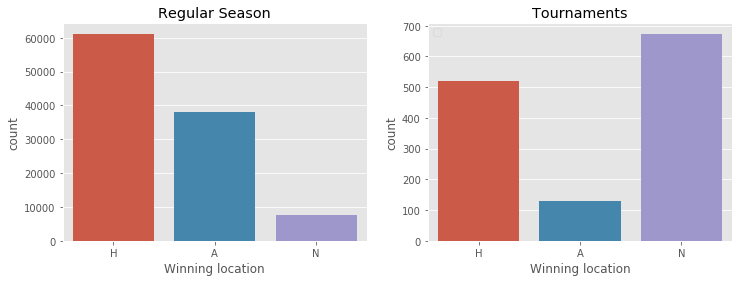

In [143]:
# look at the relative frequencies of the winning locations for both regular season and tournament
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))
ax1 = sns.countplot(x=RegularCompact['WLoc'],ax=ax1)
ax1.set_title("Regular Season")
ax1.set_xlabel('Winning location')
ax2 = sns.countplot(x=TourneyCompact['WLoc'],ax=ax2)
ax2.set_title("Tournaments")
ax2.set_xlabel('Winning location')

plt.legend();

In [148]:
# determine the winningest and losing-est teams from the data set

# losers
losers = RegularCompact.groupby('LTeamID')['LTeamID'].agg('count')
losers = losers.sort_values(ascending=False)
loss_count = pd.DataFrame(losers).merge(Teams, left_index=True, right_on='TeamID')[['TeamName','LTeamID']]
loss_count.rename(columns={'LTeamID':'Loss Count'}).head(10)

,TeamName,Loss Count
1,Air Force,514
14,Ark Pine Bluff,465
147,Lafayette,463
51,Chicago St,457
282,St Francis NY,453
67,CS Fullerton,449
358,Wofford,448
349,Washington St,446
247,Rhode Island,444
346,Wagner,444


In [147]:
# winners
winners = RegularCompact.groupby('WTeamID')['WTeamID'].agg('count')
winners = winners.sort_values(ascending=False)
wins_count = pd.DataFrame(winners).merge(Teams, left_index=True, right_on='TeamID')[['TeamName','WTeamID']]
wins_count.rename(columns={'WTeamID':'Wins Count'}).head(10)

,TeamName,Wins Count
62,Connecticut,666
296,Tennessee,574
289,Stanford,573
222,Notre Dame,560
23,Baylor,559
80,Duke,559
352,WI Green Bay,555
213,North Carolina,501
50,Chattanooga,496
156,Louisville,491


In [149]:
wins_losses = pd.merge(wins_count, loss_count, how='outer')

In [152]:
wins_losses.head()

,TeamName,WTeamID,LTeamID
0,Connecticut,666,41
1,Tennessee,574,113
2,Stanford,573,110
3,Notre Dame,560,119
4,Baylor,559,126


In [161]:
# look at just 2019 to assess expected tournament performance
wins_2019 = RegularCompact2019.groupby('WTeamID')['WTeamID'].agg('count')
wins_2019 = wins_2019.sort_values(ascending=False)
wins_2019 = pd.DataFrame(wins_2019).merge(Teams, left_index=True, right_on='TeamID')[['TeamName', 'WTeamID']]
wins_2019 = wins_2019.rename(columns={'WTeamID':'Win Count'})

losses_2019 = RegularCompact2019.groupby('LTeamID')['LTeamID'].agg('count')
losses_2019 = losses_2019.sort_values(ascending=False)
losses_2019 = pd.DataFrame(losses_2019).merge(Teams, left_index=True, right_on='TeamID')[['TeamName', 'LTeamID']]
losses_2019 = losses_2019.rename(columns={'LTeamID':'Loss Count'})


# combine into one dataframe to ease of interpretting
winloss2019 = pd.merge(wins_2019, losses_2019, how='outer')
winloss2019.sort_values('Win Count', ascending=False).head(50)
winloss2019 = winloss2019.fillna(0)
winloss2019.head(20)

,TeamName,Win Count,Loss Count
0,Louisville,32,2.0
1,Mississippi St,32,1.0
2,Connecticut,32,0.0
3,Baylor,31,1.0
4,Belmont,30,3.0
5,Mercer,30,2.0
6,Oregon,30,4.0
7,WI Green Bay,29,3.0
8,Notre Dame,29,3.0
9,FL Gulf Coast,27,4.0
